In [1]:
import numpy as np
import pandas as pd
import keras
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
keras.datasets.mnist.load_data()  ##加载数据集

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
(x_Train, y_Train), (x_Test, y_Test) = keras.datasets.mnist.load_data()  #加载训练和测试数据集

In [4]:
print('x_train_image:',x_Train.shape)  #打印训练图像数目和大小
print('y_train_label:',y_Train.shape)   #打印训练图像标签

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [5]:
print('x_test_image:',x_Test.shape) #打印测试图像数目和大小
print('y_test_label:',y_Test.shape) #打印测试图像标签数

x_test_image: (10000, 28, 28)
y_test_label: (10000,)


In [6]:
import matplotlib.pyplot as plt   #画图库
def plot_image(image):
    fig = plt.gcf()     #Get Current Figure 获取当前图标
    fig.set_size_inches(2, 2)  #设置高和宽
    plt.imshow(image, cmap='binary')  #设置颜色映射
    plt.show() #显示图表

In [7]:
x_Train[0]  

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

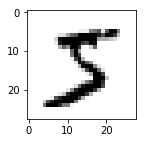

In [8]:
plot_image(x_Train[0])  #调用函数显示图像

In [9]:
y_Train[0]  #第0个训练的标签

5

In [10]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):    #显示图像和标签
    fig = plt.gcf()
    fig.set_size_inches(12, 14)  #设置大小
    if num>25: num=25 #设置最大显示25个
    for i in range(0, num): #迭代
        ax=plt.subplot(5,5, 1+i) #显示5*5格式
        ax.imshow(images[idx], cmap='binary') #显示 设置颜色映射
        title= "label=" +str(labels[idx])  #设置标题为标签
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])    #如果有识别值就显示识别出的 
        ax.set_title(title,fontsize=10)   #字体设置为10号
        ax.set_xticks([]);ax.set_yticks([]) 
        idx+=1 
    plt.show()

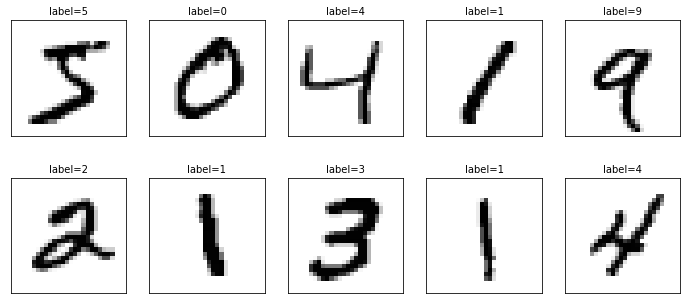

In [11]:
plot_images_labels_prediction(x_Train,y_Train,[],0,10)  #测试 显示训练集

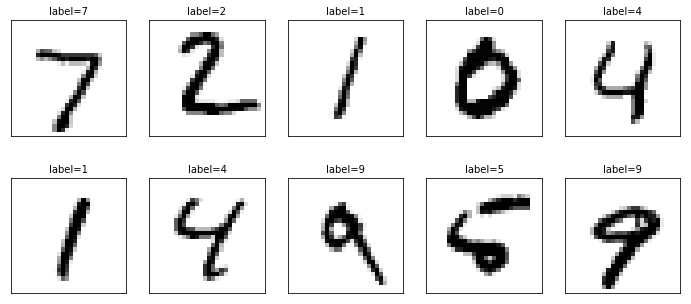

In [12]:
plot_images_labels_prediction(x_Test,y_Test,[],0,10) #测试 显示测试集

In [13]:
x_Train.shape  

(60000, 28, 28)

In [14]:
# 多加一個顏色的維度 
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [15]:
x_Train4D.shape

(60000, 28, 28, 1)

In [16]:
# 將數值縮小到0~1
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [17]:
# 把類別做Onehot encoding
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [18]:
y_Train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [19]:
y_TrainOneHot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

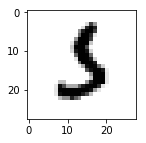

In [20]:
plot_image(x_Test[340]) 

In [21]:
y_Test[340] 

5

# 建立CNN模型

In [22]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [23]:
model = Sequential()  #使用Sequential模型

In [24]:
#filter為16, Kernel size為(5,5),Padding為(same) #add堆叠模型 2维卷积层 
model.add(Conv2D(filters=16, #卷积核数目
                 kernel_size=(5,5), #卷积核大小
                 padding='same', #补0策略
                 input_shape=(28,28,1), #当卷积层作为第一层时，需要输入图片的三维信息
                 activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


添加一层卷积层，构造16个过滤器，每个过滤器覆盖范围是5*5*1,图像四周补一圈0
并用relu进行非线性变换。
输入图像为28*28*1 （28-5+1）=24 padding补全0 
“same”代表保留边界处的卷积结果，通常会导致输出shape与输入shape相同。
padding=kernel_size-stride=4
特征图为 28*28*16

In [25]:
# MaxPooling size為(2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))

池化层：将二维数组/(2,2)
得到特征图为 14*14*16 个

In [26]:
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))

第二个卷积层：
前一个经过池化得到的图进行再一次的卷积
这次的卷积层个数为36个
padding='same'
“same”代表保留边界处的卷积结果，通常会导致输出shape与输入shape相同。
得到新的特征图个数为 14*14*36

In [27]:
model.add(MaxPooling2D(pool_size=(2, 2)))

再次进行池化：
得到特征图为 7*7*36

In [28]:
# Drop掉部分神經元避免过拟合
model.add(Dropout(0.4)) #选择0.25->0.4

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [29]:
# 平坦化
model.add(Flatten())  #将二维数组变成一位数组

In [30]:
model.add(Dense(128, activation='relu'))

全连接层：
输出维度为128,激活函数为relu

In [31]:
model.add(Dropout(0.5)) #防止过拟合

In [32]:
model.add(Dense(10,activation='softmax'))

全连接输出层：
输出维度为10，激活函数为softmax
一般用于最后一维进行

In [33]:
print(model.summary()) #查看构建的卷积神经网络总览

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

## 訓練模型

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy']) 

模型训练前要进行编译：
损失函数为：categorical_crossentropy
优化器：adam
指标列表：accuracy

In [35]:
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=20, batch_size=300,verbose=2)  #需要改进

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 6s - loss: 0.5042 - acc: 0.8396 - val_loss: 0.0983 - val_acc: 0.9724
Epoch 2/20
 - 3s - loss: 0.1441 - acc: 0.9574 - val_loss: 0.0646 - val_acc: 0.9809
Epoch 3/20
 - 3s - loss: 0.1042 - acc: 0.9691 - val_loss: 0.0514 - val_acc: 0.9848
Epoch 4/20
 - 3s - loss: 0.0832 - acc: 0.9745 - val_loss: 0.0449 - val_acc: 0.9862
Epoch 5/20
 - 3s - loss: 0.0717 - acc: 0.9780 - val_loss: 0.0388 - val_acc: 0.9885
Epoch 6/20
 - 3s - loss: 0.0665 - acc: 0.9799 - val_loss: 0.0386 - val_acc: 0.9888
Epoch 7/20
 - 3s - loss: 0.0579 - acc: 0.9822 - val_loss: 0.0360 - val_acc: 0.9898
Epoch 8/20
 - 3s - loss: 0.0523 - acc: 0.9836 - val_loss: 0.0344 - val_acc: 0.9898
Epoch 9/20
 - 3s - loss: 0.0482 - acc: 0.9855 - val_loss: 0.0322 - val_acc: 0.9906
Epoch 10/20
 - 3s - loss: 0.0440 - acc: 0.9862 - val_loss: 0.0308 - val_acc: 0.9907
Epoch 11/20
 - 3s - loss: 0.0435 - acc: 0.9867 - val_loss: 0.0287 - val

epoch:训练次数
verbose：日志显示，0为不在标准输出流输出日志信息
1为输出进度条记录
2为每个epoch输出一行记录
batch_size:指定进行梯度下降时每个batch包含的样本数
batch_size越小精度越高
validation_split：0~1之间的浮点数，用来指定训练集的一定比例数据作为验证集
作为每个epoch结束后的测试的模型的指标

In [36]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

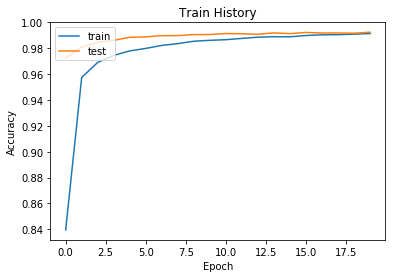

In [37]:
show_train_history('acc','val_acc')

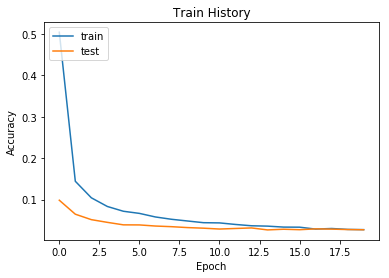

In [38]:
show_train_history('loss','val_loss')

# 評估模型準確率

In [39]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 1s 55us/step


0.9937

In [40]:
# model_digit_json = model.to_json()
# with open("model_digit.json", "w") as json_file:
#     json_file.write(model_digit_json)
# # serialize weights to HDF5
# model.save_weights("model_digit.h5")
# print("Saved model to disk")

# 預測結果

In [41]:
prediction=model.predict_classes(x_Test4D_normalize)

In [42]:
prediction[:10]   

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

# 查看預測結果

In [43]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

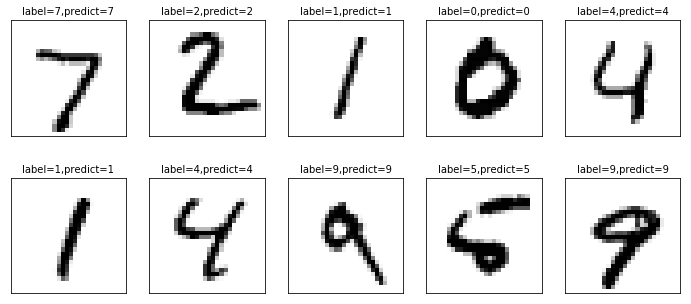

In [44]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

# confusion matrix


In [45]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,974,1,0,0,0,0,3,1,1,0
1,0,1134,1,0,0,0,0,0,0,0
2,1,1,1029,0,0,0,0,1,0,0
3,0,0,1,1005,0,2,0,1,1,0
4,0,0,0,0,980,0,0,0,0,2
5,1,0,0,4,0,884,1,0,1,1
6,1,2,0,0,1,1,953,0,0,0
7,0,3,6,0,0,0,0,1016,1,2
8,1,1,1,1,0,0,0,1,967,2


In [46]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})  #调用pandas 显示表格

In [47]:
df[(df.label==5)&(df.predict==3)]  #获取预测值中 label=5 predict=3的 图 有5个

,label,predict
1393,5,3
2035,5,3
2597,5,3
5937,5,3


In [48]:
df[(df.label==5)&(df.predict==3)].index  #显示具体的下标

Int64Index([1393, 2035, 2597, 5937], dtype='int64')

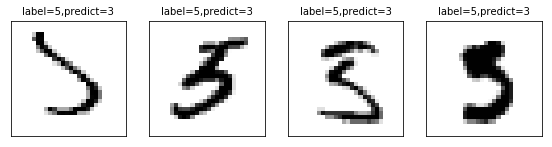

In [49]:
temp=[]
temp1=[]
temp1=df[(df.label==5)&(df.predict==3)].index  #保存具体错误的下标
for i in temp1:
    temp.append(i)
num1=len(temp)
plot_images_labels_prediction([x_Test[i] for i in temp1],
                              [y_Test[i] for i in temp1],
                              [prediction[i] for i in temp1],
                              idx=0,num=num1)

In [ ]:
#在df产生的表格中迭代。显示角标在test数据集中的图像和标签(label) 然后显示经过训练后的预测值(prediction)
#idx为初始值 num为显示的数目